## Regresión Logística: Clasificación Binaria

**Teoría**:  
La regresión logística modela la probabilidad de que una observación pertenezca a una clase (ej. 0 o 1) usando una función sigmoide.  

### Ecuación del Modelo  
$$ P(Y=1) = 1/(1 + e^{-(beta_0 + beta_1 X)}) $$  
- $P(Y=1)$: Probabilidad de pertenecer a la clase 1.  
- $\\beta_0$: Intercepto.  
- $\\beta_1$: Coeficiente de X.  

### Interpretación de Coeficientes  
- **Odds Ratio**: $e^{\\beta_1}$ indica cuánto aumentan las probabilidades de Y=1 por unidad de X.  
- **Umbral de Decisión**: Si $P(Y=1) >= 0.5$, clasificar como 1; de lo contrario, 0.

### Métricas de Evaluación  
- **Precisión**: % de predicciones correctas.  
- **Matriz de Confusión**: Verdaderos positivos (TP), falsos positivos (FP), etc.

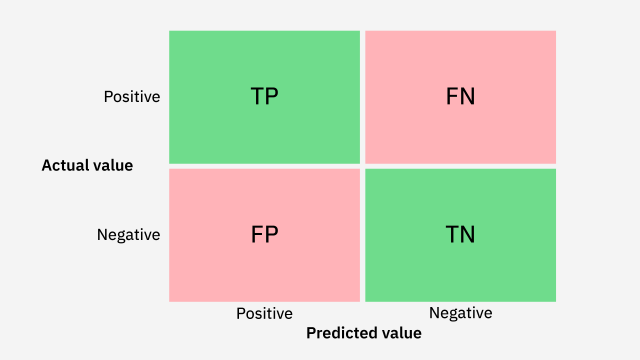

- **AUC-ROC**: Área bajo la curva ROC (1 = perfecto, 0.5 = aleatorio).

# --- Carga de Datos Locales

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/ejemplo-umsa/datos/main/enfermedades_respiratorias.csv"
datos = pd.read_csv(url)
print("Columnas del dataset:", datos.columns.tolist())

# --- Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Ejercicio Guiado 1: Manejo de valores faltantes
datos = datos.dropna()  # ¡Los estudiantes deben justificar esta decisión!

In [ ]:
# Separar características (X) y target (y)
X = datos[['edad', 'nivel_contaminacion', 'humedad']]
y = datos['enfermo']  # 1 = Enfermo, 0 = Sano

In [ ]:
# Ejercicio Guiado 2: Estandarización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ¡Los estudiantes deben probar sin escalar!

In [ ]:
# Split datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# --- Modelado

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# --- Evaluación

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

print(f"Precisión: {accuracy:.2f} | AUC-ROC: {roc_auc:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)

# --- Visualización

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()